<a href="https://colab.research.google.com/github/RAGISHIVANAND/DEEP_LEARNING/blob/main/practise_keras_ann_categorical_cross_entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from tensorflow.keras.optimizers import SGD

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Dense(50, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))


# Compile the model with SGD optimizer
sgd = SGD(learning_rate=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_split=0.3, epochs=100, verbose=0)
#sgd = SGD(lr=0.001)
#model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
#history = model.fit(x_train, y_train, validation_split=0.3, epochs=100, verbose=0)


In [9]:
results = model.evaluate(x_test,y_test)
print('Test accuracy:',results[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.2902 - accuracy: 0.5642
Test accuracy: 0.5641999840736389


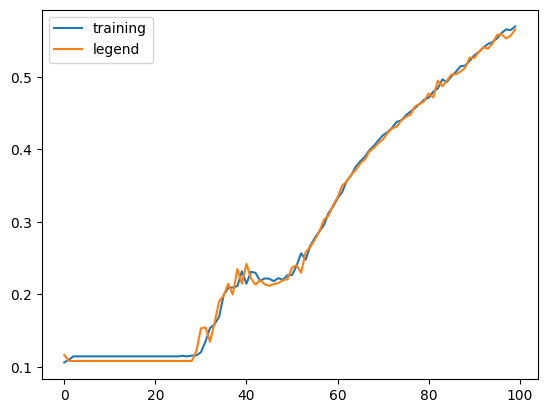

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','legend'],loc='upper left')
plt.show()

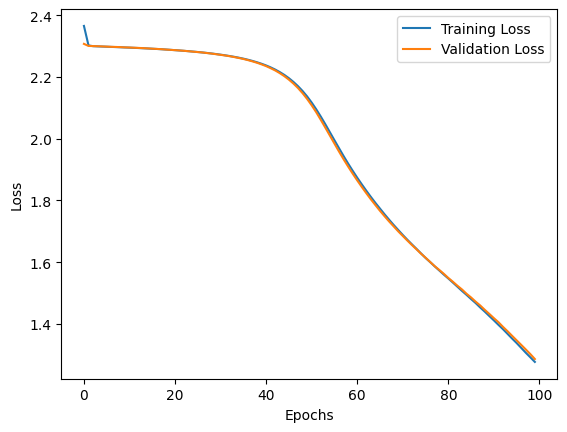

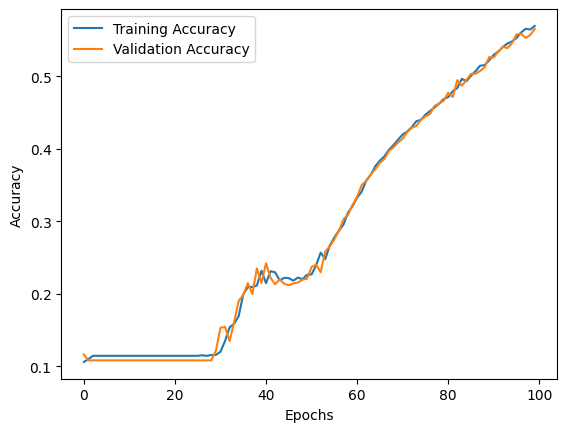

In [11]:
#history = model.fit(x_train, y_train, validation_split=0.3, epochs=100, verbose=0)

# Retrieve training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
